In [6]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [1]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
csv_path = "Dataset/placementdata.csv"
df = pd.read_csv(csv_path)

In [4]:
print("\nDataset Loaded Successfully\n")
print(df.head())
print(df.info())


Dataset Loaded Successfully

   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1             

In [ ]:
df.drop("StudentID", axis=1, inplace=True)

In [ ]:
FEATURE_COLUMNS = [
    "CGPA",
    "Internships",
    "Projects",
    "Workshops/Certifications",
    "AptitudeTestScore",
    "SoftSkillsRating",
    "ExtracurricularActivities",
    "PlacementTraining",
    "SSC_Marks",
    "HSC_Marks"
]
TARGET_COLUMN = "PlacementStatus"

In [7]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

In [ ]:
df.fillna(0, inplace=True)

In [9]:
X = df[FEATURE_COLUMNS]
y = df[TARGET_COLUMN]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [ ]:
accuracies = {}

In [14]:
print("\nTraining Models...\n")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    print(f"{name}: {acc*100:.2f}%")


Training Models...

Logistic Regression: 79.37%
Decision Tree: 70.87%
Random Forest: 77.60%
Gradient Boosting: 79.00%


In [21]:
rf_model = models["Random Forest"]

importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": FEATURE_COLUMNS,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df

,Feature,Importance
9,HSC_Marks,0.218029
4,AptitudeTestScore,0.156308
8,SSC_Marks,0.126585
0,CGPA,0.119093
2,Projects,0.104118
5,SoftSkillsRating,0.093906
6,ExtracurricularActivities,0.072895
3,Workshops/Certifications,0.051029
1,Internships,0.033930
7,PlacementTraining,0.024107


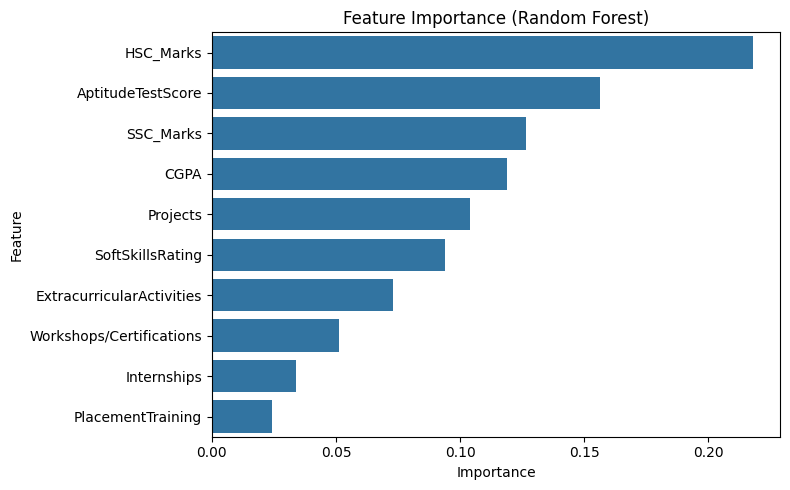

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df
)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [23]:
top_features = feature_importance_df["Feature"].head(2).tolist()
top_features

['HSC_Marks', 'AptitudeTestScore']

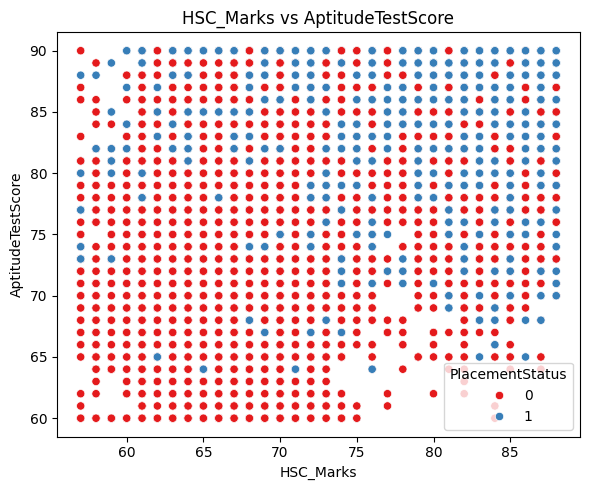

In [24]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=df[top_features[0]],
    y=df[top_features[1]],
    hue=df[TARGET_COLUMN],
    palette="Set1"
)
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f"{top_features[0]} vs {top_features[1]}")
plt.tight_layout()
plt.show()

In [15]:
os.makedirs("model", exist_ok=True)


In [16]:

joblib.dump(models["Gradient Boosting"], "model/placement_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(FEATURE_COLUMNS, "model/feature_columns.pkl")

['model/feature_columns.pkl']

In [ ]:
print("\nModel files saved successfully")


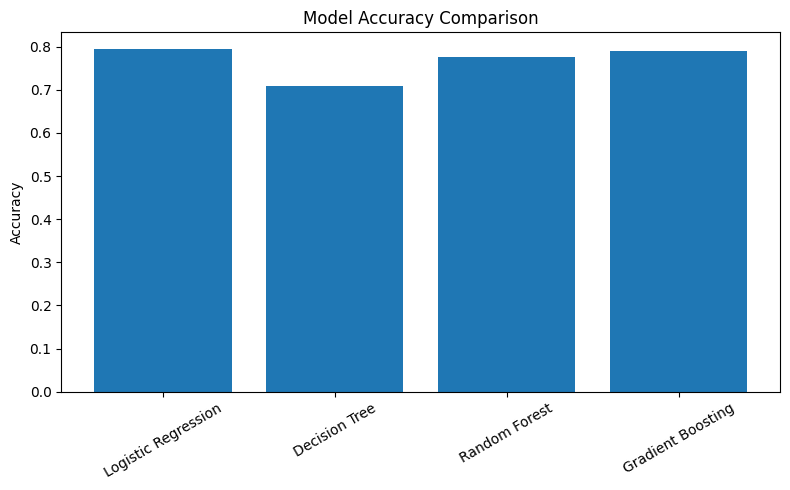

In [17]:
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values())
plt.xticks(rotation=30)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.savefig("model_accuracy.png")

In [ ]:
cm = confusion_matrix(
    y_test,
    models["Gradient Boosting"].predict(X_test_scaled)
)

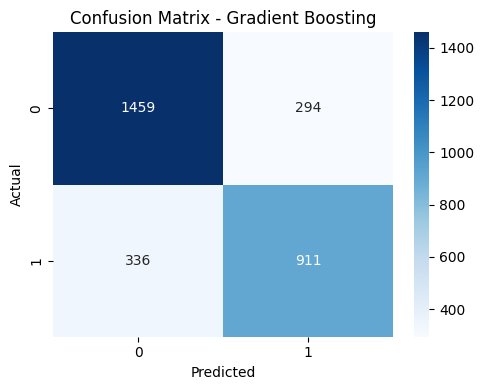

In [19]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png")